In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

cancer = datasets.load_breast_cancer(as_frame=True)
df = cancer.frame
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [8]:
#load values in python
data_list = df['mean radius'].values.tolist()

#loads the list
#data_list

#function to calculate mean value/average
def calculate_average(data):
    return sum(data)/len(data)
calculate_average(data_list)

14.127291739894552

In [9]:
#numpy
data_array = df['mean radius'].values
np.mean(data_array)

np.float64(14.127291739894552)

In [10]:
#pandaas
mean_value = df['mean radius'].mean()
mean_value

np.float64(14.127291739894552)

In [11]:
#median function with python
def median_value(data):
    new_list=sorted(data)
    x = len(new_list)

    if x%2==0:
        center1=n/2
        center2=n/2 +1
        return (new_list[int(center1)]+new_list[int(center2)])/2
    else: return new_list[int(x/2)]

median_value(data_list)

13.37

In [12]:
#numpy
np.median(data_array)

np.float64(13.37)

In [13]:
np.median(df['mean radius'])

np.float64(13.37)

In [15]:
#pandas
df['mean radius'].median()

np.float64(13.37)

In [20]:
#cdf ni hisoblash
def calculate_cdf(data):
    new_data=sorted(data)
    return new_data, np.arange(0, 1, 1/len(new_data))

calculate_cdf(data_list)

([6.981,
  7.691,
  7.729,
  7.76,
  8.196,
  8.219,
  8.571,
  8.597,
  8.598,
  8.618,
  8.671,
  8.726,
  8.734,
  8.878,
  8.888,
  8.95,
  9.0,
  9.029,
  9.042,
  9.173,
  9.268,
  9.295,
  9.333,
  9.397,
  9.405,
  9.423,
  9.436,
  9.465,
  9.504,
  9.567,
  9.606,
  9.667,
  9.668,
  9.676,
  9.683,
  9.72,
  9.731,
  9.738,
  9.742,
  9.742,
  9.755,
  9.777,
  9.787,
  9.847,
  9.876,
  9.876,
  9.904,
  10.03,
  10.05,
  10.08,
  10.16,
  10.17,
  10.18,
  10.2,
  10.25,
  10.26,
  10.26,
  10.26,
  10.29,
  10.32,
  10.44,
  10.48,
  10.48,
  10.49,
  10.49,
  10.51,
  10.51,
  10.57,
  10.57,
  10.6,
  10.65,
  10.66,
  10.71,
  10.75,
  10.8,
  10.8,
  10.82,
  10.86,
  10.88,
  10.9,
  10.91,
  10.94,
  10.95,
  10.96,
  10.97,
  11.04,
  11.04,
  11.06,
  11.06,
  11.06,
  11.08,
  11.08,
  11.13,
  11.13,
  11.14,
  11.15,
  11.16,
  11.2,
  11.22,
  11.22,
  11.25,
  11.26,
  11.26,
  11.27,
  11.27,
  11.28,
  11.29,
  11.3,
  11.31,
  11.32,
  11.33,
  11.34,
  11

Text(0, 0.5, 'F^(x)')

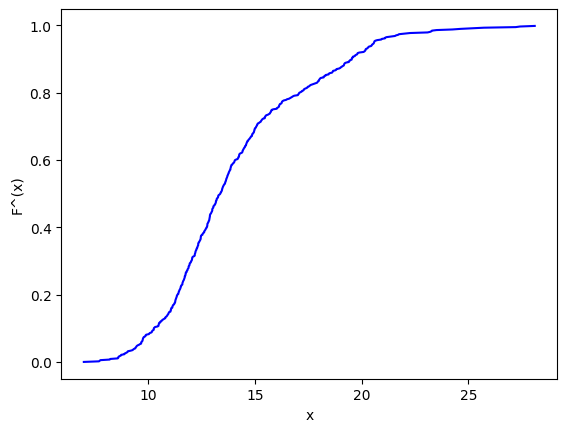

In [22]:
x,y=calculate_cdf(data_list)
plt.plot(x,y,label='CDF', color='blue')
plt.xlabel('x')
plt.ylabel('F^(x)')

/var/folders/2s/kw_rwvhn10q4r6bv09y0my5r0000gn/T/ipykernel_31128/1434867125.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


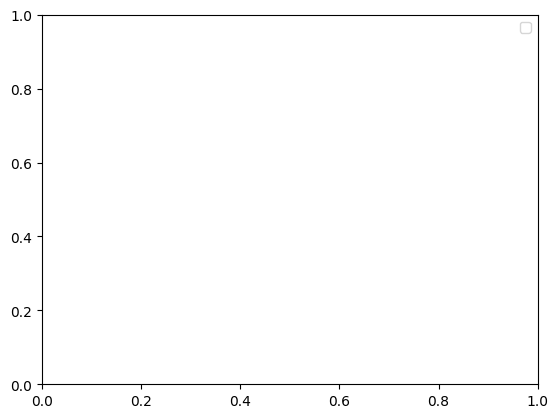

In [26]:
plt.legend()
#edit legend tepadagi kichkina boxni korsatish uchun ekan

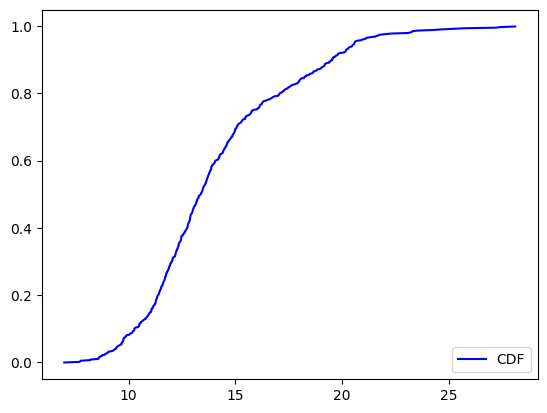

In [25]:
plt.plot(x,y,label='CDF', color='blue')
plt.legend(loc="lower right")

In [29]:
#inverse CDF
def qualtiles(data):
    x = len(data)
    q0 = data[0]
    q1 = data[int(x*0.25)]
    q2 = data[int(x*0.5)]
    q3 = data[int(x*0.75)]
    q4 = data[int(x*1.0)-1]

    return q0, q1, q2, q3, q4

qualtiles(x)

(6.981, 11.7, 13.37, 15.78, 28.11)

Text(0, 0.5, 'F^-1(p)')

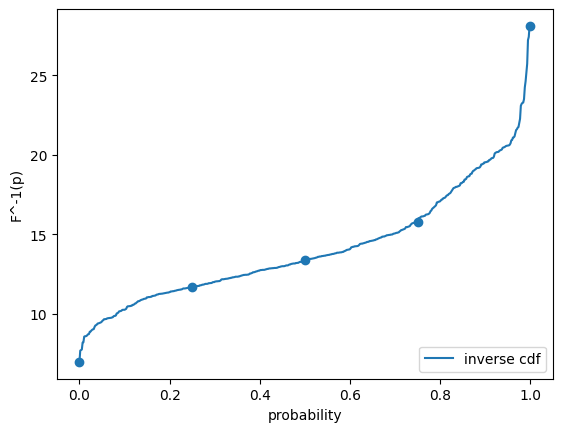

In [31]:
plt.plot(y,x,label='inverse cdf')
plt.legend(loc='lower right')
plt.scatter([0,0.25,0.5,0.75,1], qualtiles(x))
plt.xlabel('probability')
plt.ylabel('F^-1(p)')

In [33]:
q=qualtiles(x)
iqr=q[3]-q[1]
iqr

4.08

In [39]:
#outliers
outliers_min_val=df[df['mean radius'] < q[1]-1.5*iqr]
outliers_max_val=df[df['mean radius'] > q[3]+1.5*iqr]
print(outliers_max_val.size)
print(outliers_min_val.size)

434
0


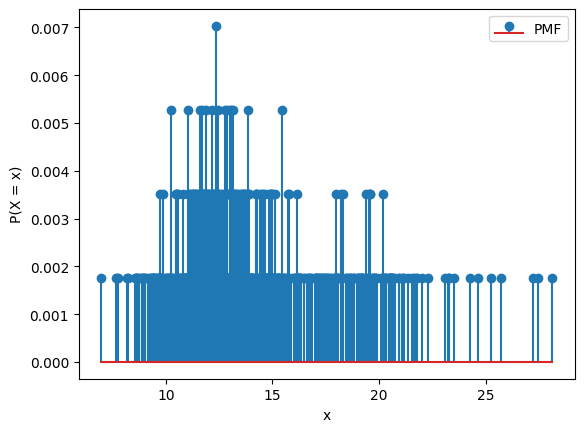

In [40]:
# pmf
def calculate_pmf(data_list):
    unique_values, counts = np.unique(data_list, return_counts=True)
    pmf = counts / len(data_list)
    return unique_values, pmf

unique_x, pmf_y = calculate_pmf(df['mean radius'])

plt.stem(unique_x, pmf_y, label='PMF')
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.legend()

In [41]:
mode_index=np.argmax(pmf_y)
unique_x[mode_index]

np.float64(12.34)

In [43]:
#variance
def variance(array):
    mean = np.mean(array)
    sq_dif = (array-mean)**2
    return np.sum(sq_dif)/len(array)

variance_val = variance(df['mean radius'].values)
variance_val

np.float64(12.397094259351807)

In [44]:
sd=np.sqrt(variance_val)
sd

np.float64(3.520950760711062)